<a href="https://colab.research.google.com/github/kishore-R10/Chennai-house-price-pred-project/blob/main/Land_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sp
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.shape

(7109, 22)

# **DATA CLEANING**

---



In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

dropping the following columns ( 'REG_FEE', 'COMMIS' ),because registration fee and commission may vary any time.It may affect our model's performance. 

In [5]:
df = df.drop(columns = ['PRT_ID','REG_FEE','COMMIS',])


In [6]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

**AREA**

In [7]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [9]:
df.AREA = df.AREA.replace('Chrompt','Chrompet')
df.AREA = df.AREA.replace('Chrmpet','Chrompet')
df.AREA = df.AREA.replace('Chormpet','Chrompet')
df.AREA = df.AREA.replace('TNagar','T Nagar')
df.AREA = df.AREA.replace('Karapakam','Karapakkam')
df.AREA = df.AREA.replace('Ana Nagar','Anna Nagar')
df.AREA = df.AREA.replace('Ann Nagar','Anna Nagar')
df.AREA = df.AREA.replace('Velchery','Velachery')
df.AREA = df.AREA.replace('Adyr','Adyar')
df.AREA = df.AREA.replace('KKNagar','KK Nagar')

In [10]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**INT_SQFT**

In [11]:
df.INT_SQFT.isnull().sum()

0

In [12]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

<function matplotlib.pyplot.show>

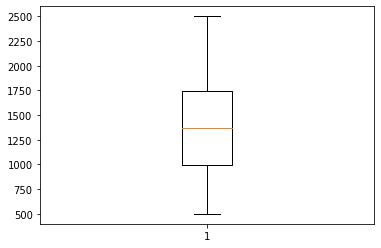

In [13]:
x = plt.boxplot(df.INT_SQFT)
plt.show

there are no outliers found.

 **DATE_SALE**

In [14]:
df.DATE_SALE.isnull().sum()

0

In [15]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [16]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format = '%d-%m-%Y',errors = 'ignore' ) #converting object into datetime object

In [17]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

**DIST_MAINROAD**

In [18]:
df.DIST_MAINROAD.isnull().sum()

0

In [19]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

**N_BEDROOM**

In [20]:
df.N_BEDROOM.isnull().sum()

1

In [21]:
df = df.dropna(subset=["N_BEDROOM"])

In [22]:
df.N_BEDROOM = df.N_BEDROOM.astype('int64') #converting float into integer

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
df.N_BEDROOM.dtype

dtype('int64')

**N_BATHROOM**

In [24]:
df.N_BATHROOM.isnull().sum()

5

In [25]:
#this column has categorical value hence we are replacing Nan with most repeating value(mode). 
df.N_BATHROOM = df.N_BATHROOM.fillna(sp.mode(df.N_BATHROOM))

In [26]:
df.N_BATHROOM.isnull().sum()

0

In [27]:
df.N_BATHROOM = df.N_BATHROOM.astype('int64') #converting float into integer
df.N_BATHROOM.value_counts()

1    5593
2    1515
Name: N_BATHROOM, dtype: int64

**N_ROOM**

In [28]:
df.N_ROOM.isnull().sum()

0

In [29]:
df.N_ROOM.value_counts()

4    2562
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

**SALE_COND**

In [30]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [31]:
df.SALE_COND = df.SALE_COND.replace('Adj Land','AdjLand')
df.SALE_COND = df.SALE_COND.replace('Ab Normal','AbNormal')
df.SALE_COND = df.SALE_COND.replace('Partiall','Partial')
df.SALE_COND = df.SALE_COND.replace('PartiaLl','Partial')


In [32]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1432
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [33]:
df.SALE_COND.isnull().sum()

0

**PARK_FACIL**

In [34]:
df.PARK_FACIL.isnull().sum()

0

In [35]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3519
Noo       2
Name: PARK_FACIL, dtype: int64

In [36]:
df.PARK_FACIL = df.PARK_FACIL.replace('Noo','No')

In [37]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3521
Name: PARK_FACIL, dtype: int64

**DATE_BUILD**

In [38]:
df.DATE_BUILD.isnull().sum()

0

In [39]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD,format = '%d-%m-%Y',errors = 'ignore') #converting object into datetime format.

**BUILDTYPE**

In [40]:
df.BUILDTYPE.isnull().sum()

0

In [41]:
df.BUILDTYPE.value_counts()

House         2443
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [42]:
df.BUILDTYPE = df.BUILDTYPE.replace('Other','Others')
df.BUILDTYPE = df.BUILDTYPE.replace('Comercial','Commercial')

In [43]:
df.BUILDTYPE.value_counts()

House         2443
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [44]:
df.UTILITY_AVAIL.isnull().sum()

0

In [45]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1828
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [46]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace('All Pub','AllPub')

**STREET**

In [47]:
df.STREET.isnull().sum()

0

In [48]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2009
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [49]:
df.STREET = df.STREET.replace('Pavd','Paved')
df.STREET = df.STREET.replace('NoAccess','No Access')

In [50]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2016
Name: STREET, dtype: int64

**MZZONE**

In [51]:
df.MZZONE.isnull().sum()

0

In [52]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1816
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**QS_ROOMS**

In [53]:
df.QS_ROOMS.isnull().sum()

0

In [54]:
df.QS_ROOMS.describe()

count    7108.000000
mean        3.517290
std         0.891905
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

**QS_BATHROOM**

In [55]:
df.QS_BATHROOM.isnull().sum()

0

In [56]:
df.QS_BATHROOM.describe()

count    7108.000000
mean        3.507358
std         0.897846
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

**QS_OVERALL**

In [57]:
df.QS_OVERALL.isnull().sum()

48

In [58]:
#This column has continuos values and less outliers,so we are replacing Nan with mean.  
df.QS_OVERALL = df.QS_OVERALL.fillna(np.mean(df.QS_OVERALL))

In [59]:
df.QS_OVERALL.isnull().sum()

0

**SALES_PRICE**

In [60]:
df.SALES_PRICE.isnull().sum()

0

In [61]:
df.SALES_PRICE.describe()

count    7.108000e+03
mean     1.089492e+07
std      3.768868e+06
min      2.156875e+06
25%      8.271875e+06
50%      1.033484e+07
75%      1.299406e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**OVERALL CHECKING AFTER CLEANING**

In [62]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [63]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7.108000e+03
mean,1382.048537,99.591728,1.637029,1.213140,3.688661,3.517290,3.507358,3.485509,3.503303,1.089492e+07
std,457.438429,57.399027,0.802902,0.409555,1.019164,0.891905,0.897846,0.887154,0.525460,3.768868e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.271875e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503303,1.033484e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299406e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


In [64]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [65]:
#calculating age of the building (in days).
df['AGE_IN_DAYS'] = (df['DATE_SALE']-df['DATE_BUILD']).dt.days

In [66]:
df.drop(columns = ['DATE_SALE','DATE_BUILD'])

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_IN_DAYS
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16060
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7300
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,17885
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,3285
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,10220
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,11680


# **EDA**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


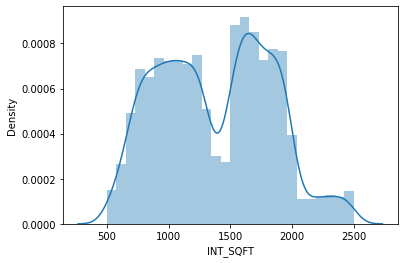

In [67]:
sns.distplot(df['INT_SQFT'])

**Observations**

1.   This is a Bimodel distribution.
2.   There is no effective skew in the data.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


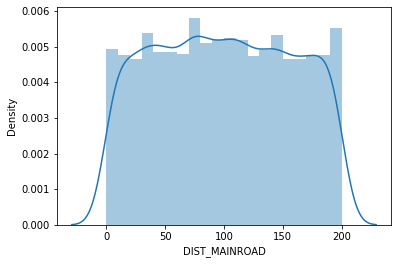

In [68]:
sns.distplot(df['DIST_MAINROAD'])

**Observations**

1.   The data is uniformally distributed.
2.   There is no skew in the data.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


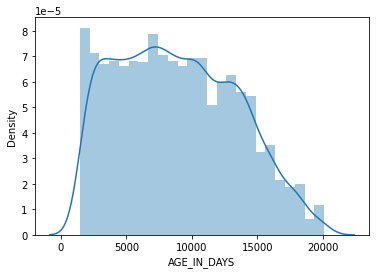

In [69]:
sns.distplot(df['AGE_IN_DAYS'])

In [70]:
df_salecond = df['SALE_COND'].value_counts()
name = df['SALE_COND'].unique()
fig = go.Figure(data=[go.Pie(labels=name,values=df_salecond,title ='Distribution of sale condition')])
fig.show()

**Observation**


1.   All the distributions are approximately equal to 20%.

**Relation between continuous value vs sales price(TARGET)**

Text(0.5, 1.0, 'AGE_IN_DAYS VS SALESPRICE')

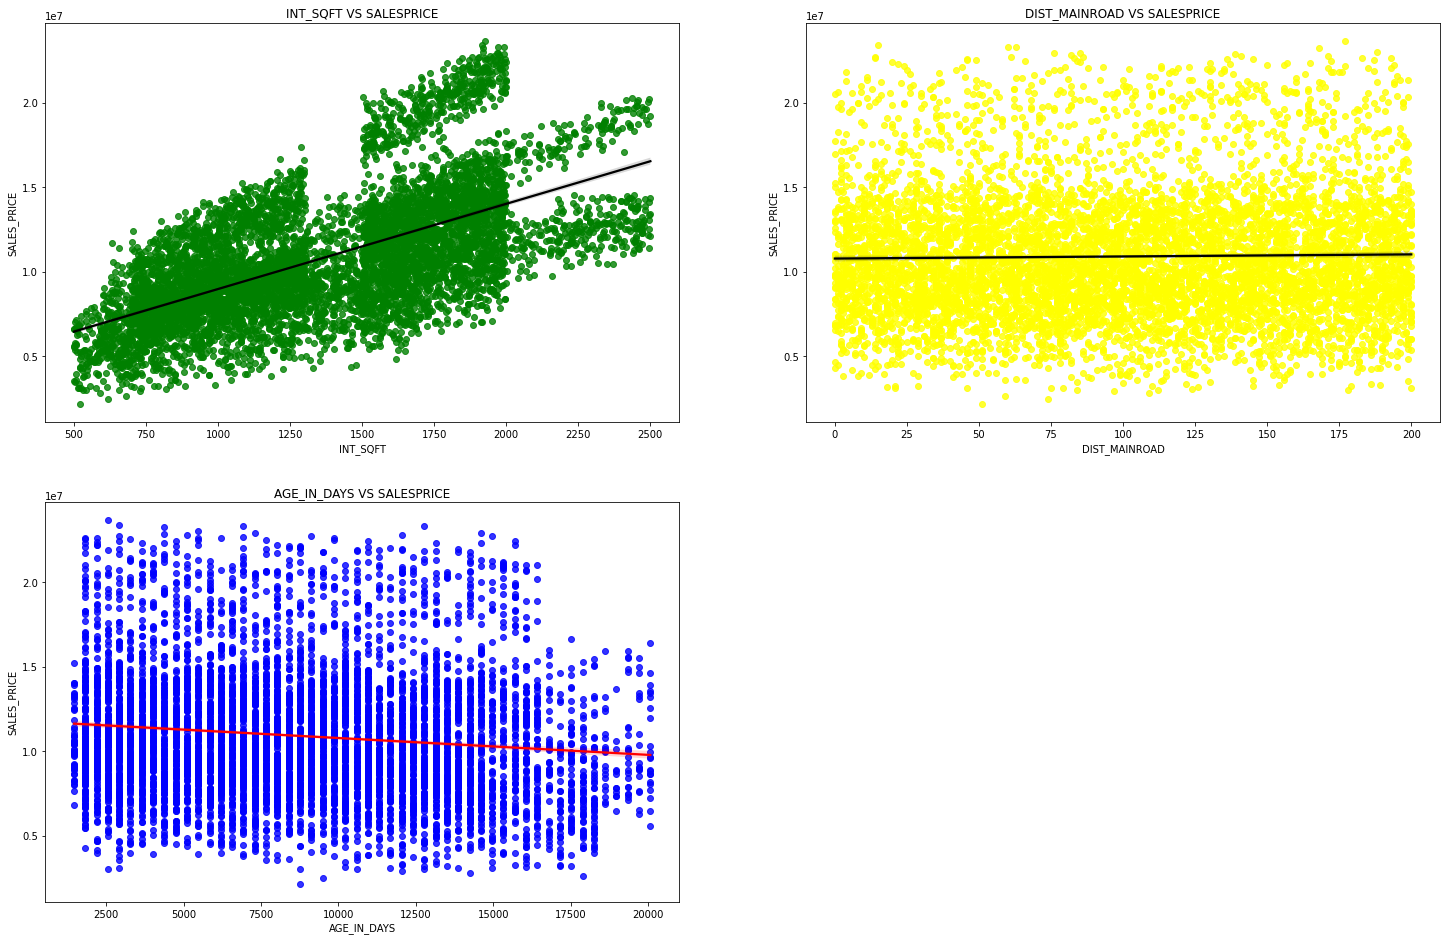

In [71]:
plt.figure(figsize = (25,25))
plt.subplot(321)
sns.regplot(x = df['INT_SQFT'],y = df['SALES_PRICE'],scatter_kws = {'color':'green'},line_kws = {'color':'black'})
plt.title('INT_SQFT VS SALESPRICE')

plt.subplot(322)
sns.regplot(x = df['DIST_MAINROAD'],y = df['SALES_PRICE'],scatter_kws = {'color':'yellow'},line_kws = {'color':'black'})
plt.title('DIST_MAINROAD VS SALESPRICE')

plt.subplot(323)
sns.regplot(x = df['AGE_IN_DAYS'],y = df['SALES_PRICE'],scatter_kws = {'color':'blue'},line_kws = {'color':'red'})
plt.title('AGE_IN_DAYS VS SALESPRICE')

**Observation for INT_SQFT VS SALESPRICE**

1.   There is a good linear relation between the feature and target value.
2.   No transformation required.
3.   As the INT_SQFT increases the sales price(TARGET) also increseas.

**Observation for DIST_MAINROAD VS SALESPRICE**


1.   There is no realtionship between the DIST_MAINROAD and salesprice (TARGET).
2.   There is no linear relationship.
3.   We can drop the DIST_MAINROAD.

**Observation for AGE_BUILD_DAYS VS SALESPRICE**


1.   There is a slight relation between AGE_BUILD_DAYS and SALESPRICE. 
2.   As the AGE_BUILD_DAYS increases the sales price(TARGET) decreases.





In [72]:
df = df.drop(columns = 'DIST_MAINROAD')

**Relationship between QS and salesprice(TARGET)**

Text(0.5, 1.0, 'QS_OVERALL VS SALESPRICE')

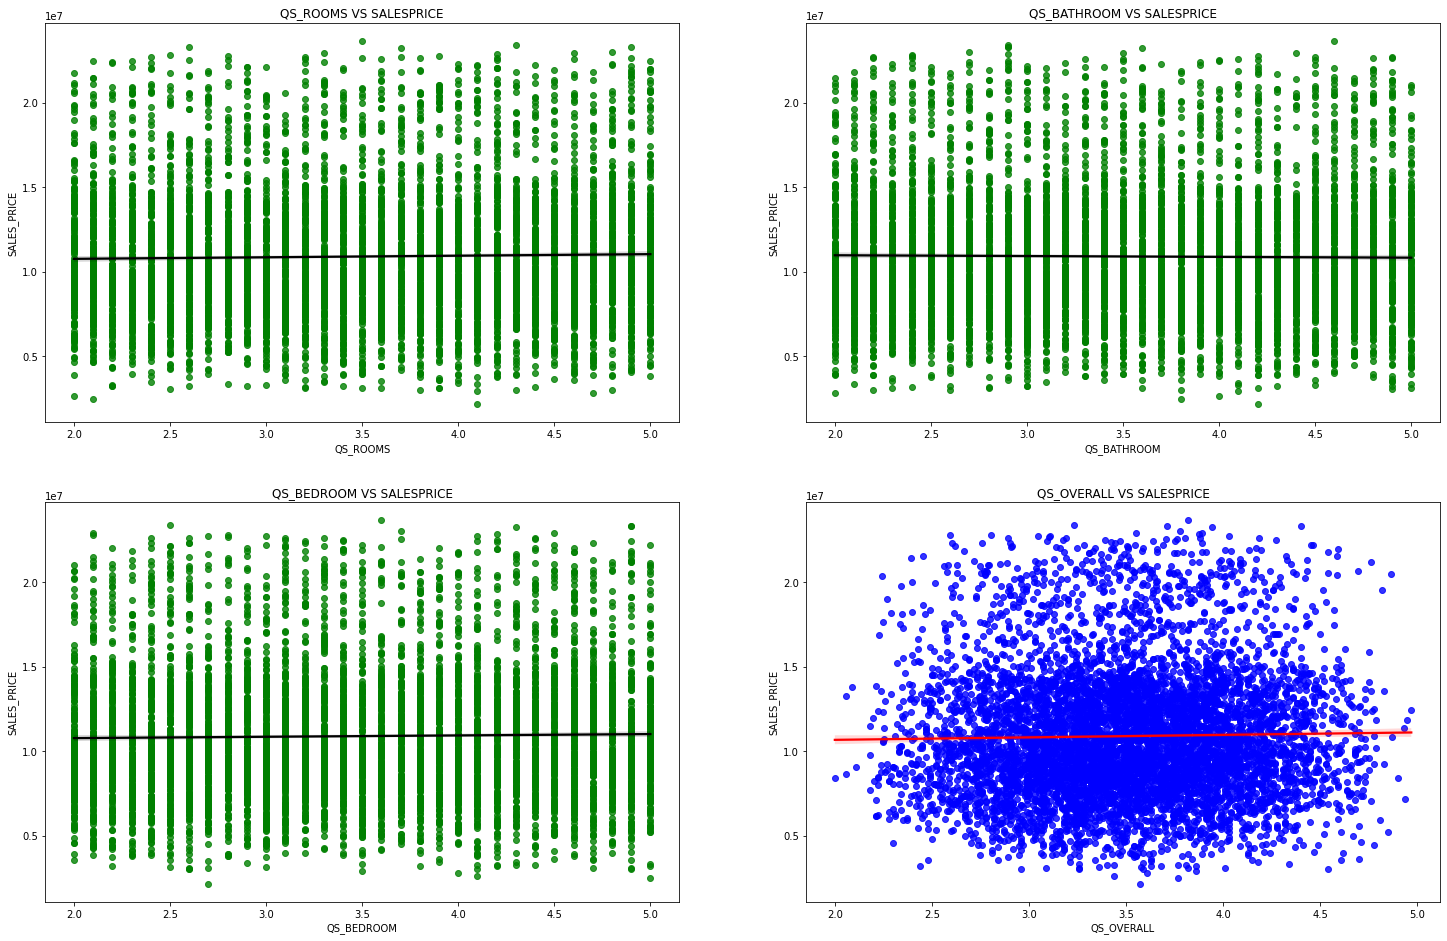

In [73]:
plt.figure(figsize = (25,25))
plt.subplot(321)
sns.regplot(x = df['QS_ROOMS'],y = df['SALES_PRICE'],scatter_kws = {'color':'green'},line_kws = {'color':'black'})
plt.title('QS_ROOMS VS SALESPRICE')

plt.subplot(322)
sns.regplot(x = df['QS_BATHROOM'],y = df['SALES_PRICE'],scatter_kws = {'color':'green'},line_kws = {'color':'black'})
plt.title('QS_BATHROOM VS SALESPRICE')

plt.subplot(323)
sns.regplot(x = df['QS_BEDROOM'],y = df['SALES_PRICE'],scatter_kws = {'color':'green'},line_kws = {'color':'black'})
plt.title('QS_BEDROOM VS SALESPRICE')

plt.subplot(324)
sns.regplot(x = df['QS_OVERALL'],y = df['SALES_PRICE'],scatter_kws = {'color':'blue'},line_kws = {'color':'red'})
plt.title('QS_OVERALL VS SALESPRICE')

**Observation**


1.   There is no relationship between QS and salesprice(TARGET).
2.   There is no linear relation.
3.   We can drop the columns. 



In [74]:
df = df.drop(columns = ['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'])

**Relationship between categorical variable and salesprice(TARGET)**

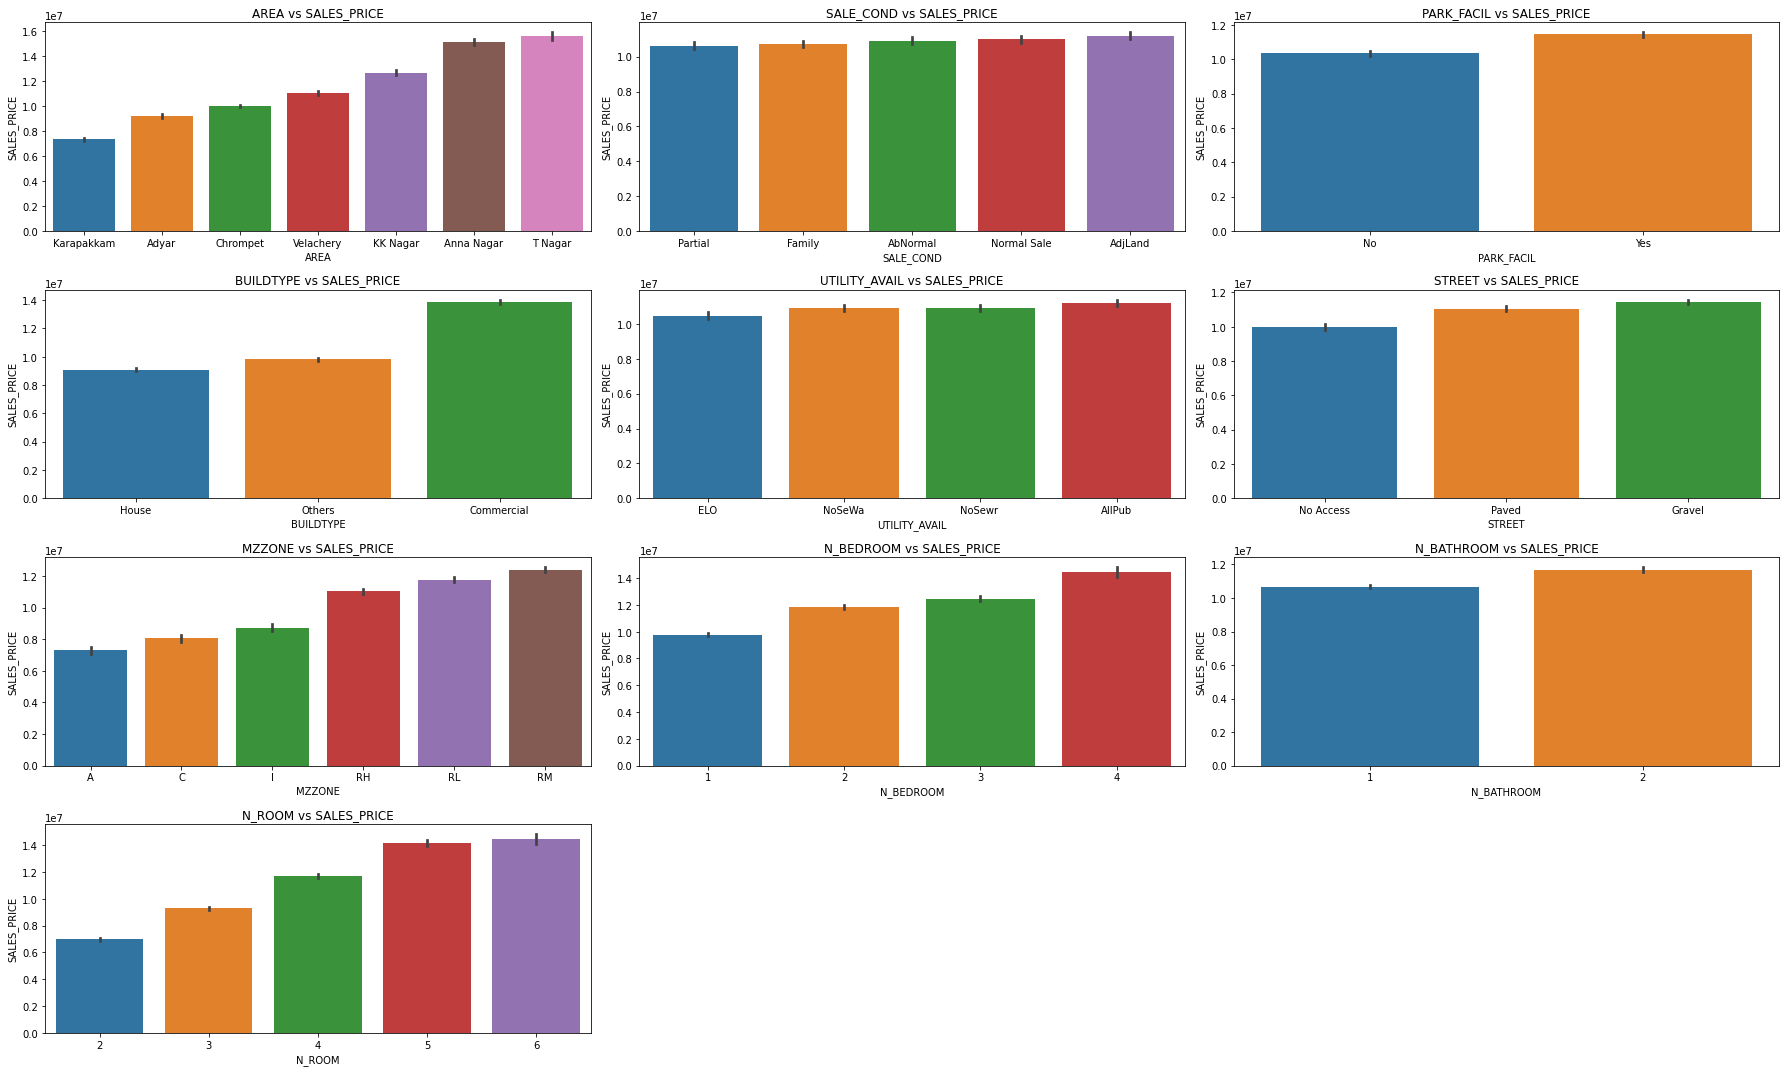

In [75]:
plt.figure(figsize = (25,15))
plt.subplot(4,3,1)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

plt.subplot(4,3,2)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

plt.subplot(4,3,3)
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

plt.subplot(4,3,4)
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

plt.subplot(4,3,5)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.subplot(4,3,6)
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

plt.subplot(4,3,7)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

plt.subplot(4,3,8)
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

plt.subplot(4,3,9)
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(4,3,10)
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

plt.tight_layout()

# **ENCODING**

---



**Nominal label encoding**

1.   In EDA when the values are sorted we can see there is a increasing linear relation for all categorical variable except for BUILDTYPE.
2.   So to maintain same order as in EDA we are doing it using map function.



In [76]:
df.AREA = df.AREA.map({'Karapakkam':0,
                       'Adyar':1,
                       'Chrompet':2,
                       'Velachery':3,
                       'KK Nagar':4,
                       'Anna Nagar':5,
                       'T Nagar':6})

In [77]:
df.SALE_COND = df.SALE_COND.map({'Partial':0,
                                 'Family':1,
                                 'AbNormal':2,
                                 'Normal Sale':3,
                                 'AdjLand':4})

In [78]:
df.PARK_FACIL = df.PARK_FACIL.map({'No':0,'Yes':1})

In [79]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0,
                                         'NoSeWa':1,
                                         'NoSewr ':2,
                                         'AllPub':3})

In [80]:
df.STREET = df.STREET.map({'No Access':0,
                           'Paved':1,
                           'Gravel':2})

In [81]:
df.MZZONE = df.MZZONE.map({'A':0,
                           'C':1,
                           'I':2,
                           'RH':3,
                           'RL':4,
                           'RM':5})

One hot encoding

After sorting there is no increasing linear relationship or order.so we are doing one hot encoding.

In [82]:
df = pd.get_dummies(df,columns = ['BUILDTYPE'],prefix = 'BUILD')

In [83]:
col = ['AREA', 'INT_SQFT',  'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL',  'UTILITY_AVAIL', 'STREET',
       'MZZONE','AGE_IN_DAYS', 'BUILD_Commercial',
       'BUILD_House', 'BUILD_Others','SALES_PRICE' ]
df = df.reindex(columns = col)       

In [84]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE_IN_DAYS,BUILD_Commercial,BUILD_House,BUILD_Others,SALES_PRICE
0,0,1004,1,1,3,2,1,3,1,0,16060,1,0,0,7600000
1,5,1986,2,1,5,2,0,3,2,3,4015,1,0,0,21717770
2,1,909,1,1,3,2,1,0,2,4,7300,1,0,0,13159200
3,3,1855,3,2,5,1,0,2,1,2,8030,0,0,1,9630290
4,0,1226,1,1,3,2,1,3,2,1,10950,0,0,1,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,4,0,0,0,5,17885,0,0,1,5353000
7105,3,1897,3,2,5,1,1,1,0,3,3285,0,0,1,10818480
7106,3,1614,2,1,4,3,0,1,2,2,10220,0,1,0,8351410
7107,0,787,1,1,2,0,1,0,1,4,11680,1,0,0,8507000


# **MODEL**

In [85]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Splitting**

In [86]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 
       'AGE_IN_DAYS', 'BUILD_Commercial', 'BUILD_House',
       'BUILD_Others']].values        #array of features
y = df['SALES_PRICE'].values          #array of targets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Scaling**

In [87]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

#**LINEAR REGRESSION**

---



In [88]:

lin_regressor = LinearRegression()
lin_regressor.fit(X_train_scaled, y_train)
y_pred_lr = lin_regressor.predict(X_test_scaled)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_lr))

R2- SCORE: 0.9242813953937152


# **KNN** 

RMSE value for k 1 is  986017.4600943434
RMSE value for k 2 is  874665.3181332999
RMSE value for k 3 is  837721.8573751599
RMSE value for k 4 is  814175.1070963545
RMSE value for k 5 is  809890.0267481841
RMSE value for k 6 is  811068.3747766368
RMSE value for k 7 is  814664.565896769
RMSE value for k 8 is  821736.4946982127
RMSE value for k 9 is  827524.2296638102
RMSE value for k 10 is  835010.8931895074


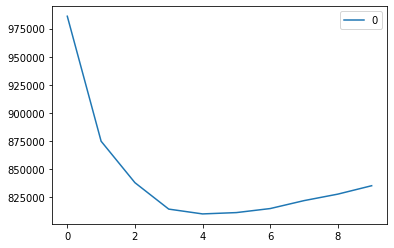

In [89]:
rmse_val = []
for K in range(10):
  K = K+1
  knn = KNeighborsRegressor(n_neighbors = K)

  knn.fit(X_train_scaled,y_train)
  y_pred_knn = knn.predict(X_test_scaled)
  error = sqrt(mean_squared_error(y_test,y_pred_knn))
  rmse_val.append(error)
  print('RMSE value for k',K ,'is ',error)

curve =pd.DataFrame(rmse_val)
curve.plot()
plt.show()   



In [90]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train_scaled,y_train)
model.best_params_

{'n_neighbors': 5}

In [91]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)
print('R2- SCORE',metrics.r2_score(y_test,y_pred_knn))

R2- SCORE 0.9520632059901842


# **DECISION TREE**

---



In [92]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
y_pred_dt = dt.predict(X_test_scaled)
print('R2- SCORE',metrics.r2_score(y_test,y_pred_dt))

R2- SCORE 0.9750732387797751


# **RANDOM FOREST**

In [93]:
rf = RandomForestRegressor(n_estimators=100,max_depth=15,max_features='sqrt')
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)
print('R2- SCORE',metrics.r2_score(y_test,y_pred_rf))

R2- SCORE 0.9867611703827265


# **GRADIENT BOOSTING**

In [94]:
x_train = X_train_scaled
x_test = X_test_scaled

In [95]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = GradientBoostingRegressor(learning_rate=i)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)
  print("Learning rate : ", i, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))


Learning rate :  0.01  Train score :  0.7432463943778109  Cross-Val score :  0.7402683322996033
Learning rate :  0.02  Train score :  0.8949266603437451  Cross-Val score :  0.892030883670787
Learning rate :  0.03  Train score :  0.9445378980468874  Cross-Val score :  0.9417321787244874
Learning rate :  0.04  Train score :  0.9653157191106171  Cross-Val score :  0.962919153236635
Learning rate :  0.05  Train score :  0.9752931228714626  Cross-Val score :  0.9733555884360301
Learning rate :  0.06  Train score :  0.9816136300126649  Cross-Val score :  0.9794868715784858
Learning rate :  0.07  Train score :  0.9860274806615412  Cross-Val score :  0.9836716069635256
Learning rate :  0.08  Train score :  0.9885790657867454  Cross-Val score :  0.987288929472764
Learning rate :  0.09  Train score :  0.9906869244086889  Cross-Val score :  0.9893401270391114
Learning rate :  0.1  Train score :  0.9926364643725971  Cross-Val score :  0.9911501038669618
Learning rate :  0.11  Train score :  0.9936

In [96]:
gbr = GradientBoostingRegressor(learning_rate=1)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print('R2-SCORE:',metrics.r2_score(y_test,y_pred_gbr))

R2-SCORE: 0.9969939961288747


# **XGBOOST**

In [97]:

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  #verbosity will neglect warnings
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.37320143260367744  Cross-Val score :  -0.38146970792808466
Learning rate :  0.02  Train score :  0.7476530765378722  Cross-Val score :  0.7439881191983906
Learning rate :  0.03  Train score :  0.9253273815550548  Cross-Val score :  0.922588762025908
Learning rate :  0.04  Train score :  0.9626699998779485  Cross-Val score :  0.96046323220532
Learning rate :  0.05  Train score :  0.9748728752565965  Cross-Val score :  0.9730418495221524
Learning rate :  0.06  Train score :  0.9816533278618301  Cross-Val score :  0.9791364794730777
Learning rate :  0.07  Train score :  0.9851114247378341  Cross-Val score :  0.983746132124765
Learning rate :  0.08  Train score :  0.9889250975784344  Cross-Val score :  0.9869787917284404
Learning rate :  0.09  Train score :  0.9905577650013749  Cross-Val score :  0.989428234529516
Learning rate :  0.1  Train score :  0.9930556683436355  Cross-Val score :  0.9910829964309202
Learning rate :  0.11  Train score :  0.99

In [98]:
xg = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
xg.fit(x_train,y_train) #train the model
y_pred_xg = xg.predict(x_test)
print('R2-SCORE:',metrics.r2_score(y_test,y_pred_xg))

[11:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2-SCORE: 0.9978264222162928


# FINAL RESULT

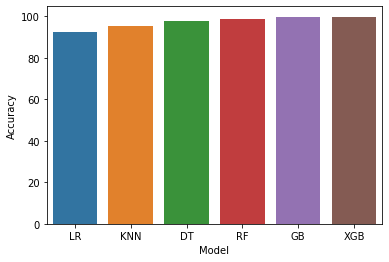

In [103]:
result = {
  "Model": ['LR', 'KNN', 'DT','RF','GB','XGB'],
  "Accuracy": [92.42, 95.20, 97.50,98.67,99.69,99.78]
}
result_df = pd.DataFrame(result)
sns.barplot(x=result_df.Model,y=result_df.Accuracy)

**Observation**

*   By comparing the accuracy of all the models,XG Boost model gives better accuracy. 
*   For this dataset the best model is XG Boost regressor.

